In [1]:
library(FateID)
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

'SeuratObject' was built with package 'Matrix' 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed



In [ ]:
sessionInfo()

# DATA IN
## Use HVG

In [13]:
data <- readRDS('./write/c25Leuko.hvg.seurat.rds')

In [14]:
meta <- read.csv('./Files/c25Leuko.hvg_obs.csv',row.names = 1)

In [15]:
head(meta)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,⋯,Leiden_sub_c27,CT_c16,CT_c27,CT_Final,EHT_num,CT_new3,EHT_tc,EHT,UMAP_1,UMAP_2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
H5_AGCCTAATCTGGGCCA-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,23,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,6.786125,-2.1896913
H5_CATTCGCGTGTGCGTC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,25,"Leiden_v2_Cluster25,1","Leiden_v2_Cluster25,1",EHT-4,4,"Leiden_v2_Cluster25,1",tc4,EHT4,7.451823,-0.1244003
H5_TACTTACTCAAGAAGT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,8.785749,-0.5882292
H5_TCAGATGCACCAGCAC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,8.911777,-1.9455942
H5_TGAAAGAAGCGCTTAT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,9.533280,-2.8265615
H6_AACTCAGTCCGATATG-3,GSM4817929,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,6.857444,-1.8406633


In [16]:
data

An object of class Seurat 
1360 features across 2305 samples within 1 assay 
Active assay: RNA (1360 features, 0 variable features)

In [39]:
x0 <- as.data.frame(data[['RNA']]@counts)

In [40]:
nrow(x0)

[1] 1360

In [41]:
x0 <- x0[rowSums(x0)>0,]
nrow(x0)

[1] 1359

In [42]:
head(x0[,1:5])

,H5_AGCCTAATCTGGGCCA-3,H5_CATTCGCGTGTGCGTC-3,H5_TACTTACTCAAGAAGT-3,H5_TCAGATGCACCAGCAC-3,H5_TGAAAGAAGCGCTTAT-3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
slc38a4,0,0.0000000,0,0.0000000,0.0000000
mrpl42,0,0.0000000,0,0.0000000,0.0000000
csrp2,0,0.0000000,0,0.7380356,0.0000000
pik3cg,0,0.0000000,0,0.0000000,0.0000000
cd9b,0,0.0000000,0,0.0000000,0.0000000
coa6,0,0.3817133,0,0.0000000,0.8194259


In [44]:
table(meta$EHT_num)


   1    2    3    4    5    6 
 123  379   98  309 5503 1256 

In [45]:
table(meta$CT_new2)


Leiden_v2_Cluster25,0 Leiden_v2_Cluster25,1 Leiden_v2_Cluster25,2 
                  379                   309                    98 
Leiden_v2_Cluster25,3          Macrophage 2               T-cells 
                  123                  1256                  5503 

In [46]:
nrow(meta)

[1] 7668

# Use leiden

In [17]:
#umap = as.matrix(meta[,c('UMAP1','UMAP2')])
umap = as.matrix(meta[,c('UMAP_1','UMAP_2')])

In [18]:
data@meta.data<-meta
data[['umap']]<-CreateDimReducObject(umap,key='UMAP')

Warning message:
"No assay specified, setting assay as RNA by default."
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP to UMAP_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_"


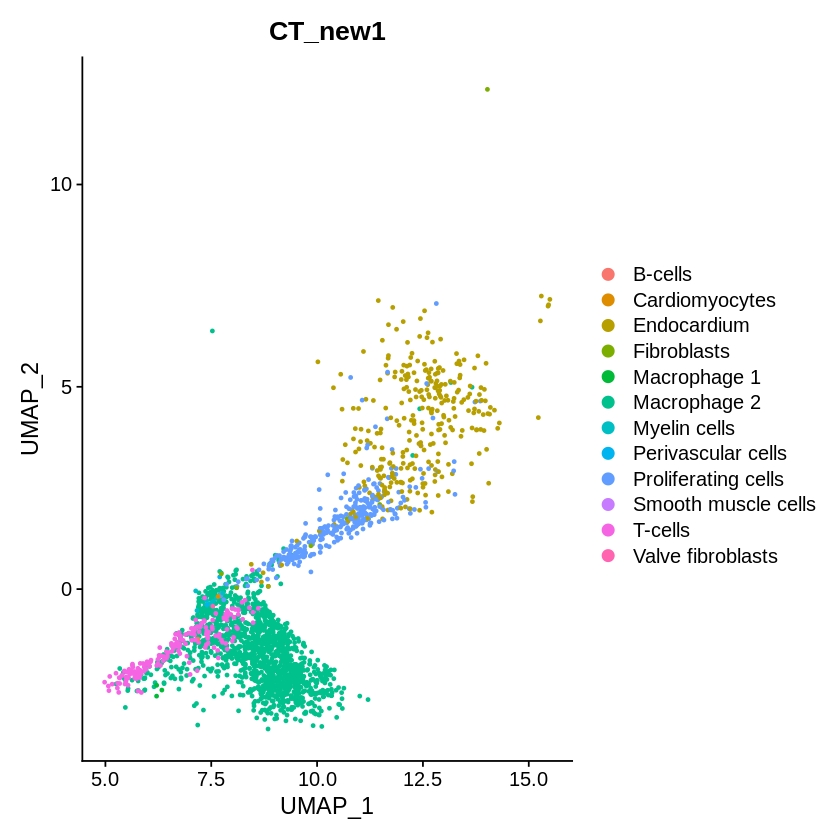

In [19]:
DimPlot(data,group.by = 'CT_new1',label = F,label.size = 8)

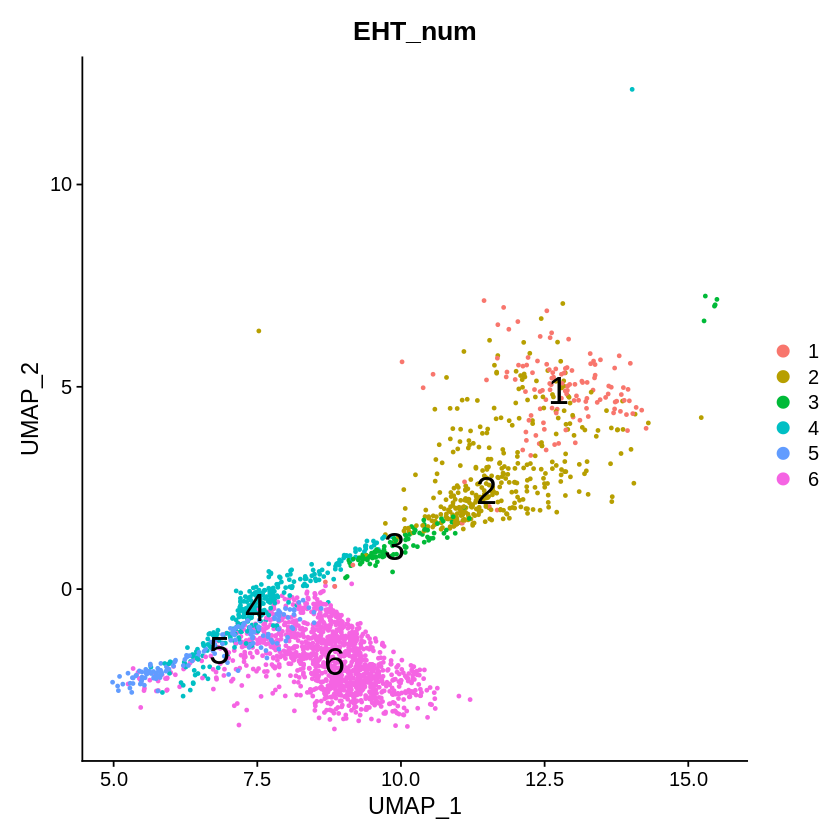

In [20]:
DimPlot(data,group.by = 'EHT_num',label = T,label.size = 8)

In [21]:
y <- data@meta.data$EHT_num
names(y)<-rownames(meta)
head(y)
table(y)
tar <- c(5,6)
tar

H5_AGCCTAATCTGGGCCA-3 H5_CATTCGCGTGTGCGTC-3 H5_TACTTACTCAAGAAGT-3 
                    6                     4                     6 
H5_TCAGATGCACCAGCAC-3 H5_TGAAAGAAGCGCTTAT-3 H6_AACTCAGTCCGATATG-3 
                    6                     6                     6

y
   1    2    3    4    5    6 
 123  379   98  309  140 1256 

[1] 5 6

In [52]:
# Use hvg
x <- x0

In [53]:
nrow(x)

[1] 1359

In [54]:
ncol(x)

[1] 7668

# Compute Fate Bias

In [55]:
# Takes long for large matrix
fb  <- fateBias(x, y, tar, 
                z=NULL, minnr=5, minnrh=10, adapt=TRUE, confidence=0.75, nbfactor=5, 
                use.dist=FALSE, seed=12345, nbtree=NULL) #minnr 5, minnrh 10

In [56]:
saveRDS(fb,'./Files/c25Leuko_wt_fb_hvg.rds')

In [63]:
write.csv(fb$probs,'./Files/c25Leuko_wt_fb_hvg.csv')

In [22]:
fb = readRDS('./Files/c25Leuko_wt_fb_hvg.rds')

In [23]:
dr <- list(umap=list(D2=data.frame(V1=meta$UMAP_1,V2=meta$UMAP_2,row.names = rownames(meta))))

In [24]:
table(y)

y
   1    2    3    4    5    6 
 123  379   98  309  140 1256 

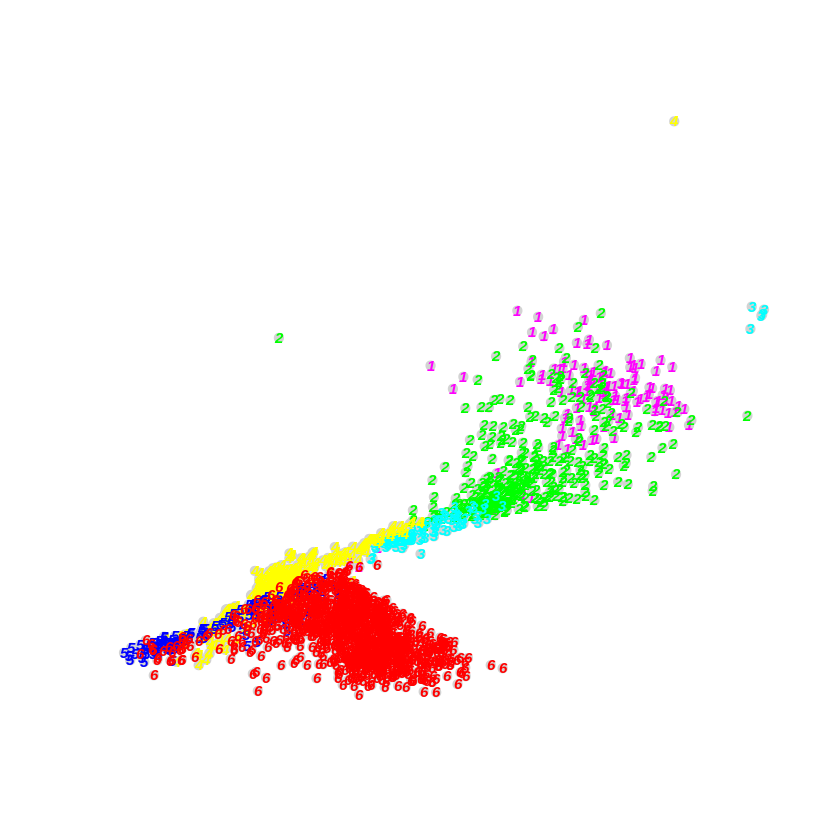

In [25]:
plotFateMap(y,dr,k=2,m="umap")

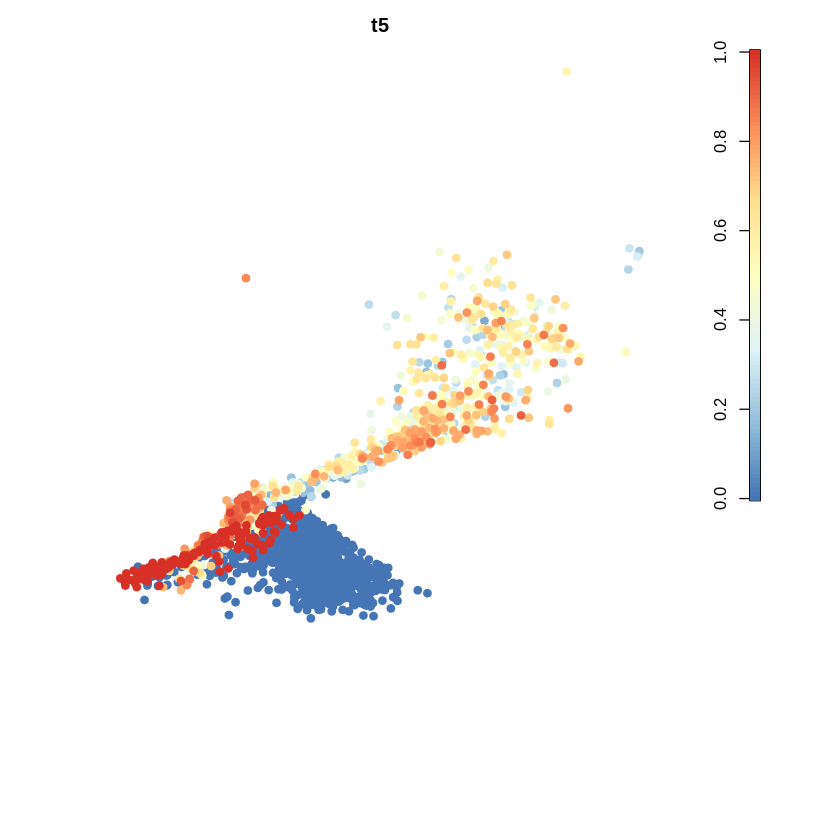

In [26]:
plotFateMap(y,dr,k=2,m="umap",fb=fb,g="t5")

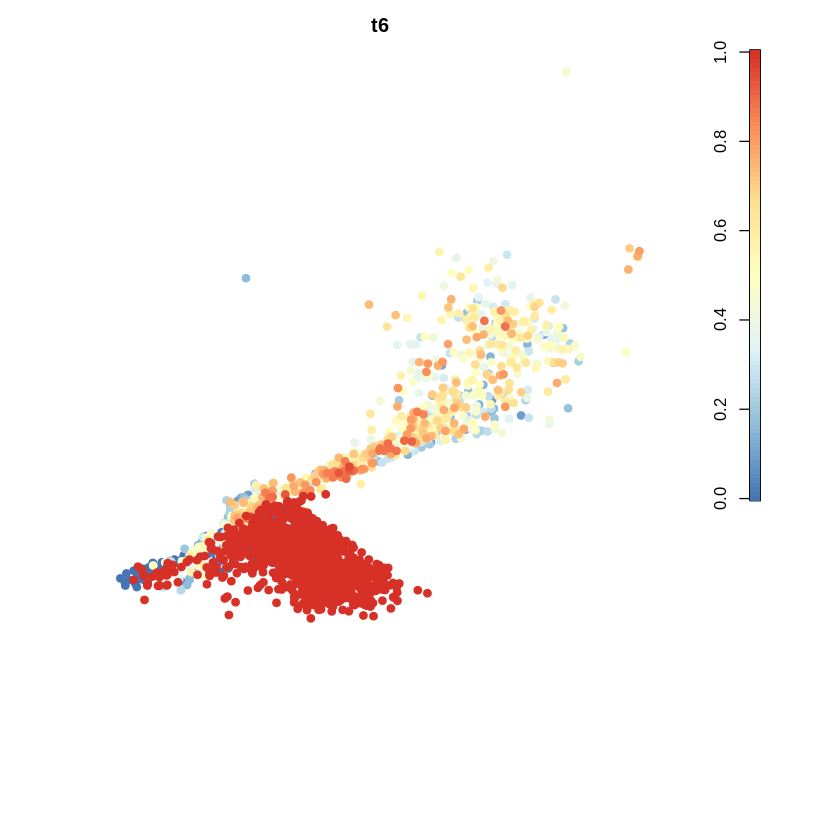

In [27]:
plotFateMap(y,dr,k=2,m="umap",fb=fb,g="t6")